In [4]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import time
import os

pwd=os.getcwd() #Creates folder string
filepath = pwd+"/banknote_data.txt"

<hr>

## Problem 1. Load dataset

<hr>

The data features $x_i = (x_{i(1)},x_{i(2)}, x_{i(3)}, x_{i(4)})$ represent four features for each bank note image (four values related to the *wavelet transform* of the image). <br><br>
The data label/target, $y_i$, indicates if the bank note is genuine ($y = 1$) or forged ($y = 0$).

1.Load the data set.<br><br>

2.What is the number $m$ of data samples?<br><br>

3.Print the first 10 and last 10 rows of the data set, and the dimensions (shape) of the data.<br>

In [5]:
#1 Import Data
data = np.loadtxt(filepath, delimiter = ',')
#2 Samples
print("Data points:",data.shape[0])
#3 Shape and rows
print(data.shape)
print("first 10 rows: \n", data[0:10,:])
print("Last 10 rows: \n", data[1362:1372,:])

Data points: 1372
(1372, 5)
first 10 rows: 
 [[ 3.6216   8.6661  -2.8073  -0.44699  0.     ]
 [ 4.5459   8.1674  -2.4586  -1.4621   0.     ]
 [ 3.866   -2.6383   1.9242   0.10645  0.     ]
 [ 3.4566   9.5228  -4.0112  -3.5944   0.     ]
 [ 0.32924 -4.4552   4.5718  -0.9888   0.     ]
 [ 4.3684   9.6718  -3.9606  -3.1625   0.     ]
 [ 3.5912   3.0129   0.72888  0.56421  0.     ]
 [ 2.0922  -6.81     8.4636  -0.60216  0.     ]
 [ 3.2032   5.7588  -0.75345 -0.61251  0.     ]
 [ 1.5356   9.1772  -2.2718  -0.73535  0.     ]]
Last 10 rows: 
 [[ -2.1668     1.5933     0.045122  -1.678      1.      ]
 [ -1.1667    -1.4237     2.9241     0.66119    1.      ]
 [ -2.8391    -6.63      10.4849    -0.42113    1.      ]
 [ -4.5046    -5.8126    10.8867    -0.52846    1.      ]
 [ -2.41       3.7433    -0.40215   -1.2953     1.      ]
 [  0.40614    1.3492    -1.4501    -0.55949    1.      ]
 [ -1.3887    -4.8773     6.4774     0.34179    1.      ]
 [ -3.7503   -13.4586    17.5932    -2.7771     1.  

<hr>

## Problem 2. Prepare the data for the lab

<hr>

In this problem you'll split the dataset into a training dataset and a test dataset and store them into separate arrays to work with: <br>

1.Create a training set <tt>dataTR</tt> consisting of the first 555 and last 445 rows of the original dataset and a set <tt>dataTS</tt> with the remaining (middle) 372 rows. <br><br>

2.Create 2D numpy arrays <tt>X_tr</tt> with rows $[1, x_{i(1)}, x_{i(2)}, x_{i(3)}, x_{i(4)}]$ with $i = 0, 1, \dots, 999$ ($\, m_{tr} = 1000 \,$) and <tt>X_ts</tt> with rows $[1, x_{j(1)}, x_{j(2)}, x_{j(3)}, x_{j(4)}]$ with $j = 0, 1, \dots, 371$ ($ \, m_{ts} = 372 \, $).<br><br>

3.Create corresponding 1D arrays <tt>y_tr</tt> and <tt>y_ts</tt> with the labels $y_i$ and $y_j$ of the data samples.<br>

In [6]:
#1 Training and Testing sets
dataTR = np.vstack([data[0:555,:],data[927:1372,:]])
dataTS = data[555:927,:]
#2 X_tr and X_ts
X_tr = np.ones([1000,5])
X_tr[:,1:5] = dataTR[:,0:4]
X_ts = np.ones([372,5])
X_ts[:,1:5] = dataTS[:,0:4]
#3 y_tr and y_ts
y_tr = dataTR[:,4]
y_ts = dataTS[:,4]
#Check
print(X_tr)
print(X_tr.shape, '\n')
print(y_tr.shape, '\n')
print(X_ts.shape, '\n')
print(y_ts.shape, '\n')

[[  1.        3.6216    8.6661   -2.8073   -0.44699]
 [  1.        4.5459    8.1674   -2.4586   -1.4621 ]
 [  1.        3.866    -2.6383    1.9242    0.10645]
 ...
 [  1.       -3.7503  -13.4586   17.5932   -2.7771 ]
 [  1.       -3.5637   -8.3827   12.393    -1.2823 ]
 [  1.       -2.5419   -0.65804   2.6842    1.1952 ]]
(1000, 5) 

(1000,) 

(372, 5) 

(372,) 



<hr>

## Problem 3. Visualize/Explore the dataset distribution

<hr>

1.Create 1D numpy arrays <tt>x_1</tt>, <tt>x_2</tt>, <tt>x_3</tt>, and <tt>x_4</tt> with the corresponding data features of the banknote images of the training dataset, and a 1D array $z = \frac{1}{2}(x_2 + x_3)$.<br><br>

2.Create two boolean 1D numpy arrays <tt>idx_genu</tt> and <tt>idx_forge</tt> to identify data samples with label $y = 1$ and $y = 0$ respectively (<em>i.e.</em>, <tt>idx_genu = (y_tr[:,0] == 1)</tt> for those with label $y = 1$).<br><br>

3.Create a figure with scatter plots of $z(y = 1)$ vs. $x_1(y = 1)$ (using red <tt>'+'</tt> markers) and $z(y = 0)$ vs. $x_1(y = 0)$ (using blue <tt>'o'</tt> markers). Include axes labels, a plot title, and a legend showing what points correspond to genuine notebanks and forged notebanks. 

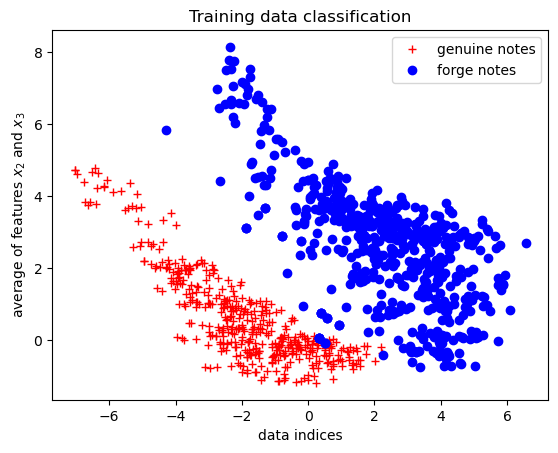

In [7]:
#1 1D Numpy arrays
x_1 = X_tr[:,1]
x_2 = X_tr[:,2]
x_3 = X_tr[:,3]
x_4 = X_tr[:,4]
z = (x_2 + x_3)/2
#2 idx_genu and idx_forge
idx_genu = (y_tr == 1)
idx_forge = (y_tr == 0)
#3 Plot
fig3, ax3 = plt.subplots()
ax3.plot(x_1[idx_genu], z[idx_genu], '+r', label = 'genuine notes')
ax3.plot(x_1[idx_forge], z[idx_forge], 'ob', label = 'forge notes')
ax3.set_xlabel('data indices')
ax3.set_ylabel('average of features $x_2$ and $x_3$')
ax3.set_title('Training data classification')
ax3.legend()

<hr>

## Problem 4. Sigmoid/logistic function

<hr>
Write a funtion definition for the sigmoid function:
$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

1.Define and plot the sigmoid function for $z \in [-10,10]$. Include labels in your plot and axes.<br><br>

2.Let $\alpha = [4.75, -5.13, -2.76, -3.41, -0.3]$ and create a 1 column numpy array <tt>p</tt> holding the values of <br><br>

$$p_{\alpha}(X_{tr}) = \sigma(X_{tr} \alpha) =
\left[ 
\begin{array}{cccc}
\sigma(\alpha_0 + \alpha_1 x_{1(1)} + \alpha_2 x_{1(2)} + \alpha_3 x_{1(3)} + \alpha_4 x_{1(4)}) \\ 
\sigma(\alpha_0 + \alpha_1 x_{2(1)} + \alpha_2 x_{2(2)} + \alpha_3 x_{2(3)} + \alpha_4 x_{2(4)}) \\ 
\vdots\\
\sigma(\alpha_0 + \alpha_1 x_{m(1)} + \alpha_2 x_{m(2)} + \alpha_3 x_{m(3)} + \alpha_4 x_{m(4)})
\end{array} 
\right]$$.

Once the optimal parameters $\alpha$ are determined, this p-values predict whether a bank note is genuine ($\, p \geq 0.5 \,$) or forged ($\, p < 0.5 \,$). <br>

Check your code: The first three and last three rows of p are, respectively: <br>

<tt> p[0:3] =  [6.64e-13 9.48e-15 5.61e-07] </tt> <br>

<tt> p[997:1000] =  [0.88  0.99  1.0]</tt>

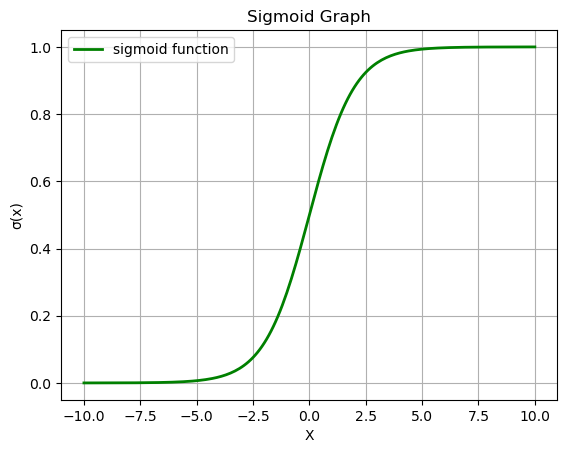

In [8]:
#1 sigmoid function
def sigmoid(z):
   return 1/(1+np.exp(-z)) 
x = np.linspace(-10, 10, 201)
plt.plot(x, sigmoid(x),lw='2',label="sigmoid function",c='green')
plt.xlabel("X")
plt.ylabel("σ(x)")
plt.title("Sigmoid Graph")
plt.grid(True)
plt.legend()

In [9]:
#2  
alpha = (4.75,-5.13,-2.76,-3.41,-0.3)
p = sigmoid(X_tr.dot(alpha))
print('First 3 rows: \n',p[0:3])
print('Last 3 rows: \n',p[997:1000])

First 3 rows: 
 [6.64159542e-13 9.47580204e-15 5.60559996e-07]
Last 3 rows: 
 [0.8781571  0.9865149  0.99995869]


<hr>

## Problem 5. Define the logistic regression loss function

<hr>
$$
L(\alpha)=-\frac{1}{m} \sum_{i=1}^m \ \big(  y_i \log(p_{\alpha}(x_i)) + (1-y_i)\log(1-p_{\alpha}(x_i)) \big)
$$

The vectorized representation is:
$$
L(\alpha)=-\frac{1}{m} \Big( y^T \log(p_{\alpha}(X_{tr})) + (1-y)^T \log(1-p_{\alpha}(X_{tr})) \Big)
$$


with $p_{\alpha}(X_{tr})= \sigma(X_{tr}\alpha)$ as defined above and $y_{tr} = (y_1, y_2, \dots, y_{m_{tr}})^T$ 

Implement the vectorized version of the logistic regression loss function. <br>

Check your code: The loss values is $0.01908$ for the vector $\alpha$ defined in Problem 4 above.

In [10]:
def LogRegLoss(alpha, X, y):
    n = X.shape[0]
    p = sigmoid(X.dot(alpha))
    term1 = y.T.dot(np.log(p))
    term2 = (1.0 - y).T.dot(np.log(1.0 - p))
    return -1.0*(term1 + term2)/n

print('Loss function for given alpha vector: %f \n' %LogRegLoss(alpha, X_tr, y_tr))

Loss function for given alpha vector: 0.019080 



<hr>

## Problem 6. Define the gradient of the logistic regression loss 

<hr>

Given the loss
$$
L(\alpha)=-\frac{1}{m} \Big( y^T \log(p_{\alpha}(X)) + (1-y)^T \log(1-p_{\alpha}(X)) \Big)
$$
The gradient is given by  
$$
\nabla_{\alpha} L(\alpha) = \frac{1}{m} X^T(p_{\alpha}(X)-y)
$$


Implement the vectorized version of the gradient of the logistic regression loss function. <br>

Check your code: The (transpose of the) gradient is <tt>[-6.3e-04  1.1e-03  2.01e-03 -1.51e-03
  3.42e-05]</tt> for the vector $\alpha$ defined in Problem 4 above. <br>

In [54]:
def Gradient(alpha,X,y):
    n = X.shape[0]
    p = sigmoid(X.dot(alpha))
    return (X.T.dot((p - y))/n)

print(Gradient(alpha, X_tr, y_tr))

[-6.29513702e-04  1.09772945e-03  2.01441636e-03 -1.50528439e-03
  3.41948178e-05]


<hr>

## Problem 7. Implement the gradient descent algorithm 

<hr>

Recall the gradient descent algorithm from lab 3:

$$
\alpha^{k+1} = \alpha^{k} - \gamma  \frac{1}{m} X^T(p_{\alpha}(X)-y)
$$

1.Implement the gradient descent algorithm for the Loss Function in Problem 5.

    Check your code: The $\alpha^{k}$ values after $5000$ iterations with $\gamma = 0.4$ are $[4.75, -5.13, -2.76, -3.41, -0.3]$ for initial values $\alpha_0 = 1, \alpha_1 = 1, \alpha_2 = 1, \alpha_3 = 1, \alpha_4 = 1$, and the loss value $L$ is $0.01907$.<br>

    How long did it take to run the optimization algorithm?<br><br>

2.Make sure you save the value of the loss function after each iteration and plot its values $L(\alpha^k)$ w.r.t. iteration $k$ the number of iterations.<br><br>

3.Repeat parts 1 and 2 with initial values $\alpha_0 = 0, \alpha_1 = 0, \alpha_2 = 0, \alpha_3 = 0, \alpha_4 = 0$. What is the value of $L$ after $5000$ iterations with $\gamma = 0.4$?<br><br>

4.Compare the value of $L$ for the two different values of $\alpha_0$ and the graphs showing how rapidly the value of the Loss function decreases in each case. What $\alpha_0$ is a better starting point for Gradient Descent? Explain why. <br>

In [55]:
# You don't have to implement GD as a function, but you can and it will make things easier...

def LogRegGD(alpha_init, X, y, gamma, kmax):
    L = np.zeros(kmax)
    k = 0
    alphak = alpha_init
    Lk = LogRegLoss(alphak, X, y)
    gradk = Gradient(alphak, X, y)
    
    while k < kmax:
        # gradient descent
        alphak -= gamma*gradk
        L[k] = LogRegLoss(alphak,X,y)
        gradk = Gradient(alphak,X,y)
        k += 1      
    return alphak, L

run-time: 1.984375
[ 4.75252724 -5.13494197 -2.76369089 -3.40911401 -0.29817785] 

0.019068950531533877 



Text(0.5, 1.0, 'Log Reg Loss Function vs. number of iterations in GD')

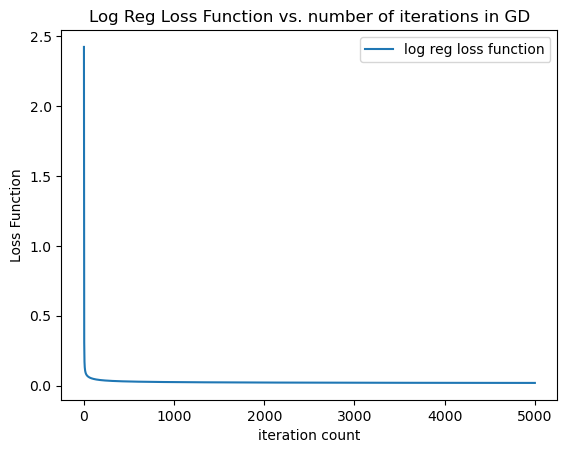

In [56]:
# This is for running GD and plotting the values of the loss function

fig7, ax7 = plt.subplots()

alpha_init = np.ones(5)
t_start_LS = time.process_time()
alphak, L = LogRegGD(alpha_init,X_tr,y_tr,0.4,5000)
t_LS = time.process_time() - t_start_LS
L1 = L[4999]
print('run-time:', t_LS)
print(alphak, '\n')
print(L1, '\n')

ax7.plot(np.linspace(0, 5000, 5000), L, label='log reg loss function')
ax7.legend()
ax7.set_xlabel('iteration count')
ax7.set_ylabel('Loss Function')
ax7.set_title('Log Reg Loss Function vs. number of iterations in GD')

run-time: 1.6875
[ 4.74855818 -5.1298598  -2.7611228  -3.40581219 -0.29764241] 

0.019077241130493246 



Text(0.5, 1.0, 'Log Reg Loss vs. # of iterations in GD with $\\alpha_0 = 0$')

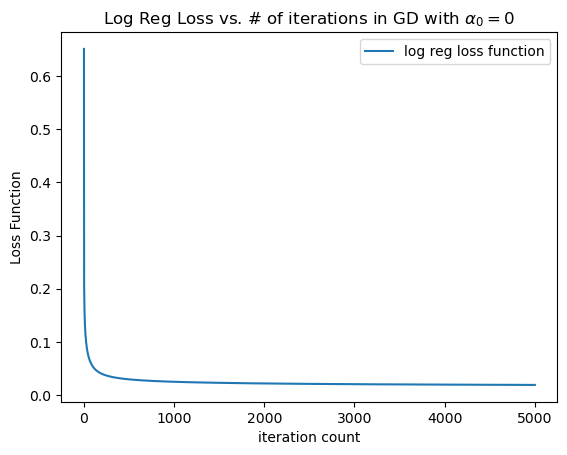

In [57]:
# Part 3

fig72, ax72 = plt.subplots()

alpha_init = np.zeros(5)
t_start_LS = time.process_time()
alphak2, L2 = LogRegGD(alpha_init,X_tr,y_tr,0.4,5000)
t_LS = time.process_time() - t_start_LS
L0=L2[4999]
print('run-time:', t_LS)
print(alphak2, '\n')
print(L2[4999], '\n')

ax72.plot(np.linspace(0, 5000, 5000), L2, label='log reg loss function')
ax72.legend()
ax72.set_xlabel('iteration count')
ax72.set_ylabel('Loss Function')
ax72.set_title('Log Reg Loss vs. # of iterations in GD with $\\alpha_0 = 0$')

4. The first value $\alpha_0$ is slightly better, since its value is smaller and we are trying to minimize the loss value (will provide better predictions).

<hr>

## Problem 8. Test your results

<hr>

1.Calculate the values of $p_{\alpha}(X)$ for the test dataset and the $\alpha$ values obtained with $\alpha_0 = {\bf 1}$ (Problem 7.1). That is, find $p_{test} = \sigma(X_{ts} \alpha)$ using the values of $\alpha$ returned by the gradient descent algorithm with $\alpha_0 = {\bf 1}$. These values represent the probability of each banknote being genuine (if $p_{\alpha}(x_j) \geq 0.5 \,$) or forged (if $p_{\alpha}(x_j) < 0.5 \,$).<br><br>

2.Compare these results with the labels $y_j$ of the data set: if $p_{\alpha}(x_j) < 0.5$ and $y_j = 0$, your model predicted correctly that the banknote was a forgery; and if $p_{\alpha}(x_j) < 0.5$ and $y_j = 1$, your model failed, it classified a genuine banknote as a forgery. Similarly, if $p_{\alpha}(x_j) \geq 0.5$ and $y_j = 1$, the model predicted correctly that the banknote was genuine, but if $p_{\alpha}(x_j) \geq 0.5$ and $y_j = 0$, the model predicts that a forged banknote is genuine.<br><br>

3.Question:</b> What percentage of authentic banknotes from the test dataset are mistakenly classified as forgeries? (Explain, show work/code)<br><br>

4.Question:</b> What percentage of forged banknotes from the test dataset are mistakenly classified as genuine? (Explain, show work/code)<br><br>

5.Repeat parts 1 - 4 for the $p$-values obtained for the test data set and the $\alpha$ values obtained with $\alpha_0 = {\bf 0}$ (Problem 7.3)<br><br>

6.What model makes a better predictions, the one obtained with $\alpha_0 = {\bf 1}$ as the initial value for gradient descent, or the one obtained with $\alpha_0 = {\bf 0}$?

In [44]:
# compute values p(x) for multiple data points x

p_test = sigmoid(X_ts.dot(alphak))
m_test = X_ts.shape[0]

genu_total = np.sum(y_ts)
forge_total = m_test-genu_total

forge_pos = 0
forge_neg = 0

genu_pos = 0
genu_neg = 0

for j in range(0,m_test):
    if p_test[j] < 0.5 and y_ts[j] == 0:
            forge_pos += 1
    elif p_test[j] < 0.5 and y_ts[j] == 1:
            genu_neg += 1
    elif p_test[j] >= 0.5 and y_ts[j] == 1:
            genu_pos += 1
    else:
        if y_ts[j] == 0:
            forge_neg += 1

In [53]:
print('A total of %d test notes were known to be genuine, and %d were known to be forged \n' %(genu_total, forge_total))
print('Number of authentic notes mistakenly classified as forged: %d \n' %genu_neg)
print('Percentage of aunthentic notes mistakenly classified as forged: %f%% \n' %(100.0*genu_neg/genu_total))
print('Number of forged notes mistakenly classified as authentic: %d \n' %forge_neg)
print('Percentage of forged notes mistakenly classified as authentic: %f%% \n' %(100*forge_neg/forge_total))

A total of 165 test notes were known to be genuine, and 207 were known to be forged 

Number of authentic notes mistakenly classified as forged: 3 

Percentage of aunthentic notes mistakenly classified as forged: 1.818182% 

Number of forged notes mistakenly classified as authentic: 2 

Percentage of forged notes mistakenly classified as authentic: 0.966184% 



In [50]:
# compute values p(x) for multiple data points x

p_test = sigmoid(X_ts.dot(alphak2))
m_test = X_ts.shape[0]

genu_total = np.sum(y_ts)
forge_total = m_test-genu_total

forge_pos = 0
forge_neg = 0

genu_pos = 0
genu_neg = 0

for j in range(0,m_test):
    if p_test[j] < 0.5 and y_ts[j] == 0:
            forge_pos += 1
    elif p_test[j] < 0.5 and y_ts[j] == 1:
            genu_neg += 1
    elif p_test[j] >= 0.5 and y_ts[j] == 1:
            genu_pos += 1
    else:
        if y_ts[j] == 0:
            forge_neg += 1

In [51]:
print('A total of %d test notes were known to be genuine, and %d were known to be forged \n' %(genu_total, forge_total))
print('Number of authentic notes mistakenly classified as forged: %d \n' %genu_neg)
print('Percentage of aunthentic notes mistakenly classified as forged: %f%% \n' %(100.0*genu_neg/genu_total))
print('Number of forged notes mistakenly classified as authentic: %d \n' %forge_neg)
print('Percentage of forged notes mistakenly classified as authentic: %f%% \n' %(100*forge_neg/forge_total))

A total of 165 test notes were known to be genuine, and 207 were known to be forged 

Number of authentic notes mistakenly classified as forged: 3 

Percentage of aunthentic notes mistakenly classified as forged: 1.818182% 

Number of forged notes mistakenly classified as authentic: 2 

Percentage of forged notes mistakenly classified as authentic: 0.966184% 



6. $\alpha_0$ and $\alpha_1$ produce the exact same results. So, neither is better than the other.